<h4>Problem 1

In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [419]:
df1 = pd.read_csv('bank_marketing_part1_Data.csv')

<h4>1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [420]:
df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [421]:
df1.tail(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [422]:
print('Number of rows in the dataset',df1.shape[0])
print('Number of columns in the dataset',df1.shape[1])

Number of rows in the dataset 210
Number of columns in the dataset 7


In [423]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [424]:
df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [425]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [426]:
df1.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [427]:
data_num = df1.select_dtypes(['float64'])

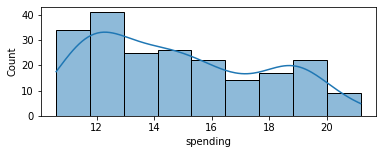

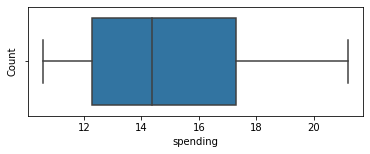

---------------------------------------------------------------------------------------------------


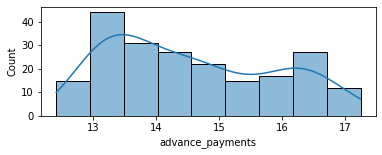

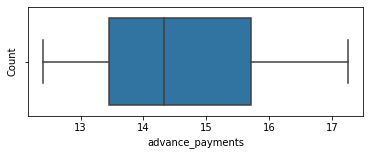

---------------------------------------------------------------------------------------------------


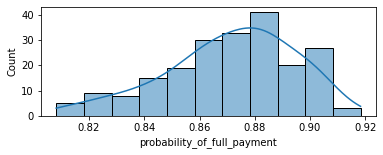

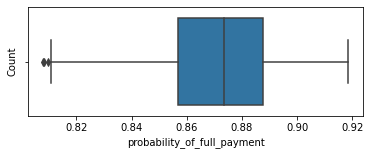

---------------------------------------------------------------------------------------------------


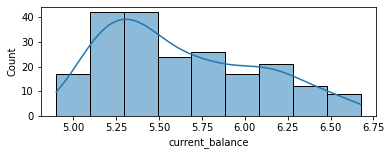

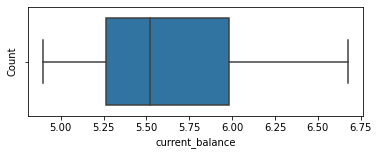

---------------------------------------------------------------------------------------------------


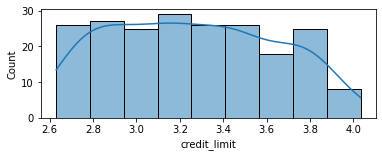

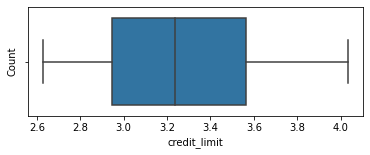

---------------------------------------------------------------------------------------------------


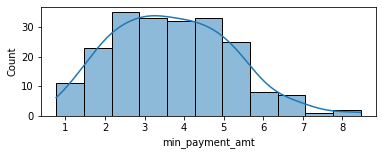

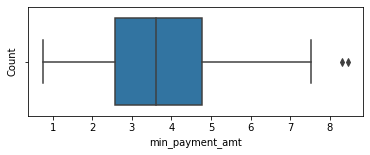

---------------------------------------------------------------------------------------------------


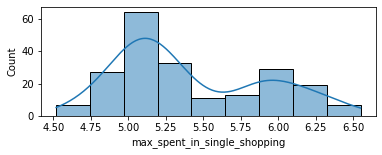

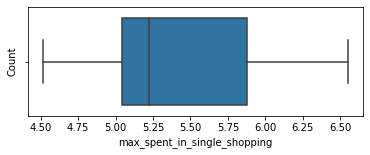

---------------------------------------------------------------------------------------------------


In [428]:
for i in data_num.columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data_num[i], kde=True)
    plt.show()
    plt.figure(figsize=(6,2))
    sns.boxplot(x=i, data=data_num)
    plt.ylabel('Count')
    plt.show()
    print('---------------------------------------------------------------------------------------------------')

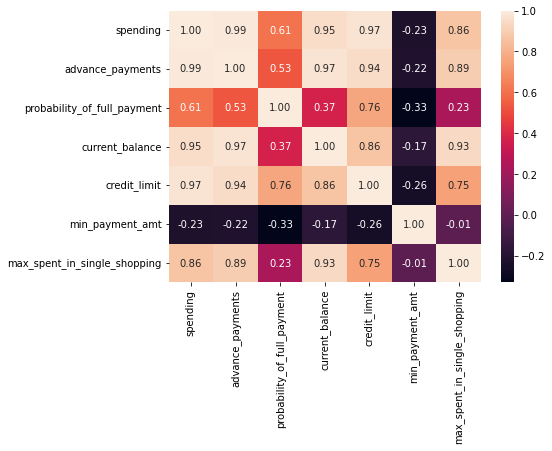

In [429]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

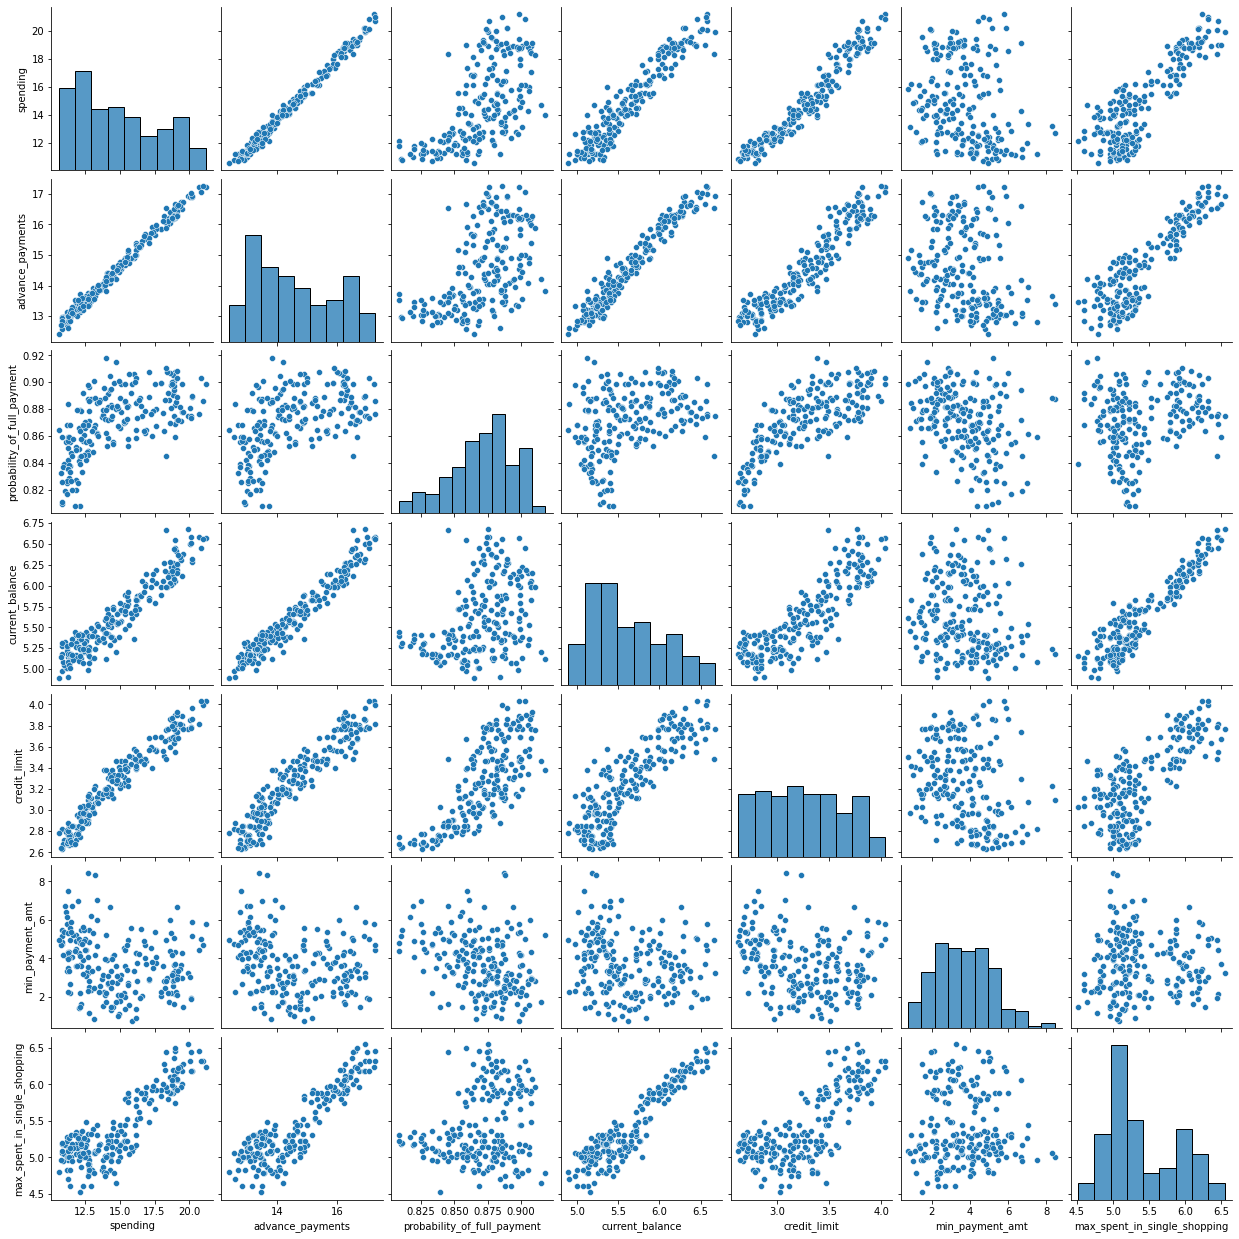

In [430]:
sns.pairplot(df1);
plt.savefig('Pairplot1.jpeg')  

<h4>1.2  Do you think scaling is necessary for clustering in this case? Justify

In [181]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [182]:
from sklearn.preprocessing import MinMaxScaler
X =MinMaxScaler().fit(df1)
scaled_DF = X.fit_transform(df1)
scaled_DF

array([[0.8829084 , 0.93181818, 0.60889292, ..., 0.80755524, 0.32335617,
        1.        ],
       [0.50991501, 0.51239669, 0.89201452, ..., 0.67854597, 0.33427817,
        0.30773018],
       [0.78942398, 0.8285124 , 0.67876588, ..., 0.80185317, 0.33843893,
        0.80206795],
       ...,
       [0.32483475, 0.36157025, 0.64882033, ..., 0.40698503, 0.12376965,
        0.23732152],
       [0.52219075, 0.53512397, 0.83393829, ..., 0.60940841, 0.19567281,
        0.4549483 ],
       [0.47025496, 0.5661157 , 0.40471869, ..., 0.42836778, 0.24378161,
        0.66962088]])

In [183]:
scaled_DF = pd.DataFrame(scaled_DF, index=df1.index, columns=df1.columns)

In [184]:
scaled_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.570767,0.214423,0.0,0.442831,0.593013,0.723004,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.381633,0.195498,0.0,0.233575,0.368474,0.520570,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0


<h4>1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

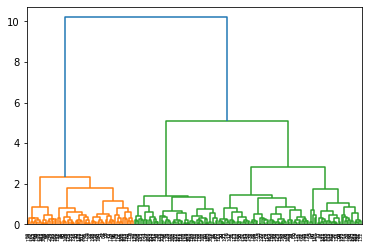

In [185]:
from scipy.cluster.hierarchy import dendrogram, linkage
HClust = linkage(scaled_DF, method = 'ward')
dend = dendrogram(HClust)

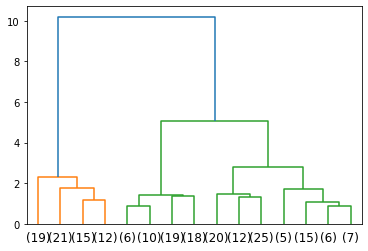

In [186]:
dend = dendrogram(HClust,truncate_mode='lastp', p = 15)

In [187]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(HClust, 3, criterion='maxclust')
clusters

array([1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [188]:
df1['HClusters'] = clusters

In [189]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,HClusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


<h4>1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [190]:
from sklearn.cluster import KMeans

In [191]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_DF)
    wss.append(KM.inertia_)
wss    

[88.98592483911843,
 34.81326792694562,
 22.02436307566604,
 18.7125520472491,
 16.17586747363163,
 14.49538146681201,
 13.211771147591119,
 11.959006327152126,
 11.086691130120556,
 10.408386383799028]

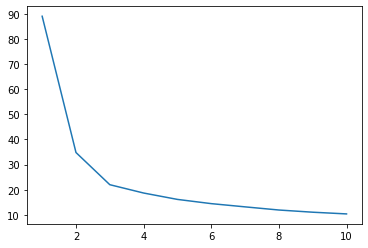

In [192]:
plt.plot(range(1,11), wss)

In [204]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_DF)

KMeans(n_clusters=3)

In [194]:
labels=k_means.labels_
labels

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2])

In [195]:
df1["KClusters"] = labels
df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,HClusters,KClusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [196]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [197]:
silhouette_score(scaled_DF,labels)

0.42210525681247923

In [432]:
silhouette_samples(scaled_DF,labels)

array([0.594242  , 0.41964259, 0.66557523, 0.52343556, 0.39942394,
       0.20784759, 0.50980651, 0.29222872, 0.54354525, 0.57711039,
       0.52696853, 0.22337267, 0.44236142, 0.56047625, 0.12826612,
       0.24222199, 0.37299552, 0.53675322, 0.06268456, 0.31104716,
       0.43090061, 0.31530685, 0.46721577, 0.337122  , 0.54160611,
       0.08098937, 0.09333586, 0.51400494, 0.57686516, 0.4622207 ,
       0.32795942, 0.51379228, 0.41567745, 0.43480245, 0.55101119,
       0.56350194, 0.53080522, 0.44316811, 0.5072196 , 0.65348274,
       0.60703843, 0.43907502, 0.37157409, 0.63564841, 0.52215541,
       0.4659816 , 0.17684732, 0.62519641, 0.51606056, 0.57389339,
       0.37301253, 0.52298645, 0.61380767, 0.62756883, 0.64812628,
       0.13117193, 0.4537905 , 0.55187661, 0.58922207, 0.59860592,
       0.56041594, 0.55056649, 0.58851857, 0.39058054, 0.47987886,
       0.60229694, 0.59616318, 0.49781569, 0.66259848, 0.25188687,
       0.36527496, 0.38324137, 0.58025987, 0.61254594, 0.22645

In [199]:
silhouette_samples(scaled_DF,labels).min()

0.004601020857671852

In [200]:
df1.to_csv('Clustered_data.csv')

<h4>1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

<h4>Problem 2

In [205]:
df2=pd.read_csv('insurance_part2_data.csv')

<h4>2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [206]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [207]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [208]:
df2.shape

(3000, 10)

In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [210]:
df2.duplicated().sum()

139

In [211]:
df2.drop_duplicates(inplace=True)

In [212]:
df2.shape

(2861, 10)

In [213]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [214]:
data_num = df2.select_dtypes(['float64','int64'])

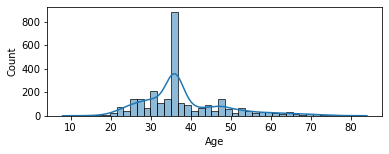

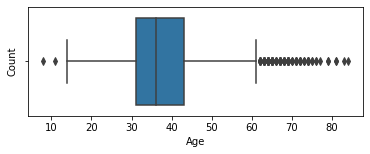

---------------------------------------------------------------------------------------------------


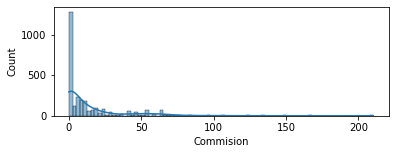

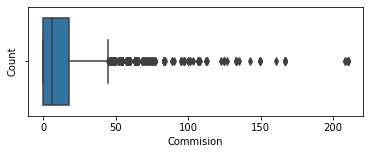

---------------------------------------------------------------------------------------------------


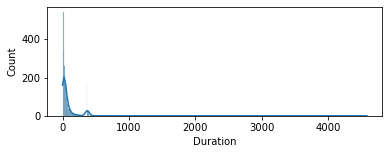

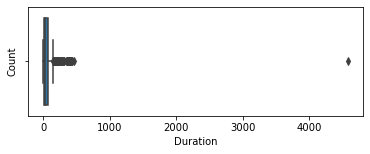

---------------------------------------------------------------------------------------------------


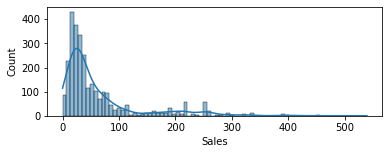

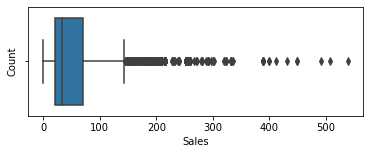

---------------------------------------------------------------------------------------------------


In [215]:
for i in data_num.columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data_num[i], kde=True)
    plt.show()
    plt.figure(figsize=(6,2))
    sns.boxplot(x=i, data=data_num)
    plt.ylabel('Count')
    plt.show()
    print('---------------------------------------------------------------------------------------------------')

In [216]:
df2[df2['Duration']<1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [217]:
df2[df2['Duration']>4000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [218]:
df2['Duration'] = df2['Duration'].replace(to_replace=-1,value=df2['Duration'].mean())
df2['Duration'] = df2['Duration'].replace(to_replace=0,value=df2['Duration'].mean())
df2['Duration'] = df2['Duration'].replace(to_replace=4580.0,value=df2['Duration'].mean())

In [219]:
df2['Duration'].mean()

70.62062497638195

In [220]:
data_num_new = df2.select_dtypes(['float64','int64'])

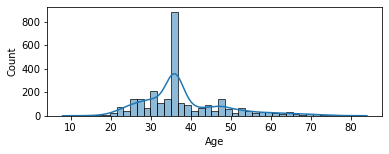

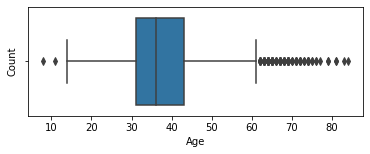

---------------------------------------------------------------------------------------------------


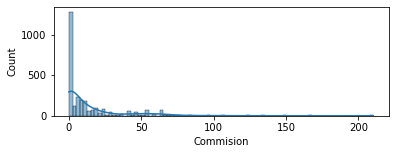

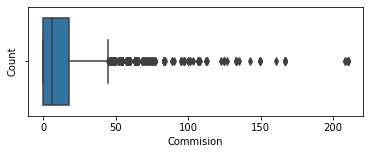

---------------------------------------------------------------------------------------------------


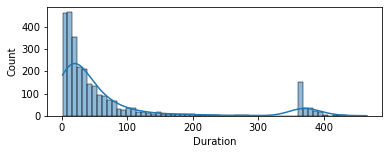

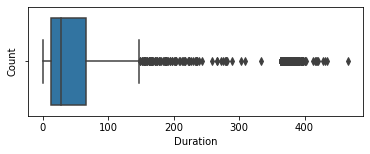

---------------------------------------------------------------------------------------------------


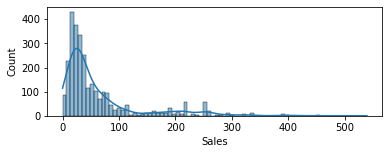

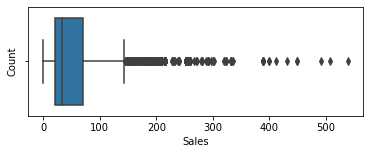

---------------------------------------------------------------------------------------------------


In [221]:
for i in data_num.columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data_num_new[i], kde=True)
    plt.show()
    plt.figure(figsize=(6,2))
    sns.boxplot(x=i, data=data_num_new)
    plt.ylabel('Count')
    plt.show()
    print('---------------------------------------------------------------------------------------------------')

In [222]:
data_cat = df2.select_dtypes(['object'])

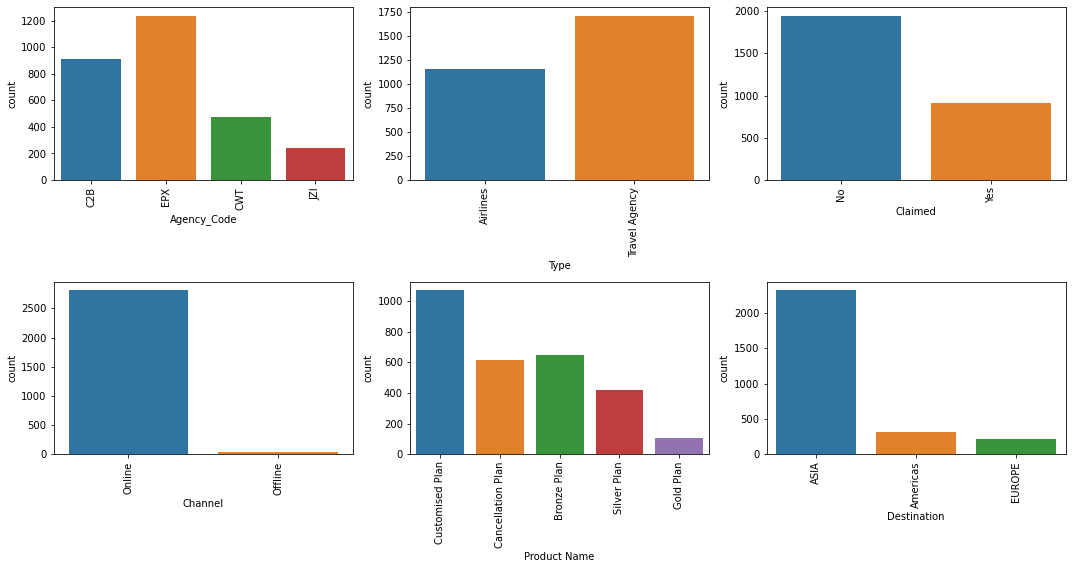

In [223]:
fig=plt.figure(figsize=(15,8))
for i in range(0,len(data_cat.columns)):
    fig.add_subplot(2,3,i+1)
    sns.countplot(x=data_cat.columns[i], data=data_cat);
    plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

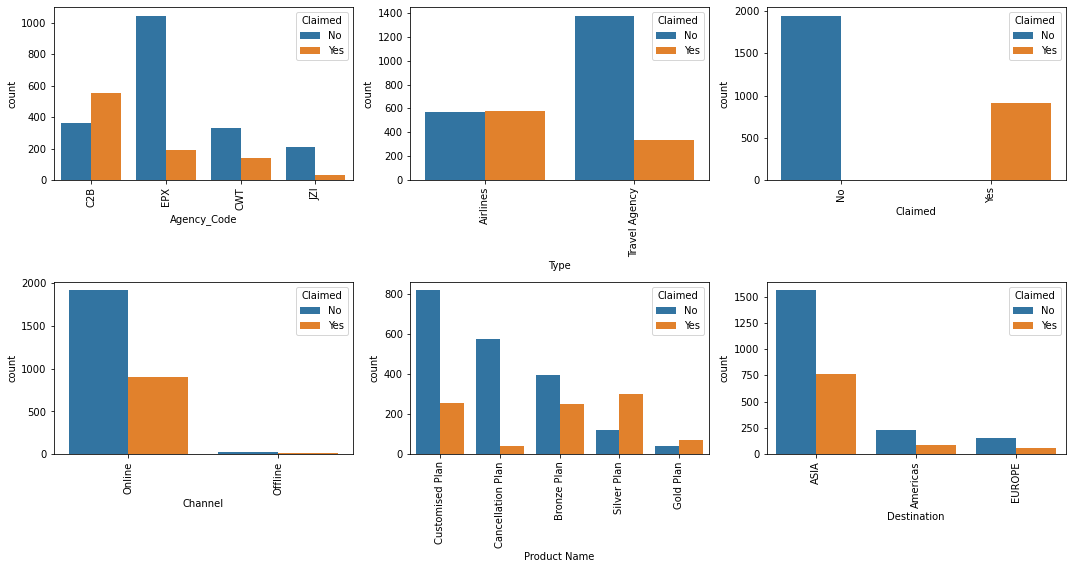

In [412]:
fig=plt.figure(figsize=(15,8))
for i in range(0,len(data_cat.columns)):
    fig.add_subplot(2,3,i+1)
    sns.countplot(x=data_cat.columns[i], data=data_cat, hue='Claimed');
    plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

In [224]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 193.1 KB


In [227]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Agency_Code,2861.0,1.280671,1.003773,0.0,0.0,2.00,2.00,3.00
Type,2861.0,0.597344,0.490518,0.0,0.0,1.00,1.00,1.00
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.00,1.00,1.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.00,1.00,1.00
Duration,2861.0,70.620625,106.662105,1.0,12.0,28.00,66.00,466.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.00,2.00,4.00
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.00,0.00,2.00


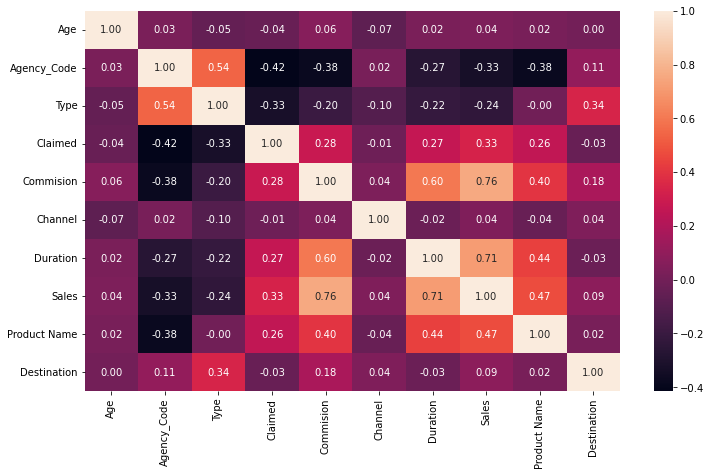

In [228]:
plt.figure(figsize=(12,7))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

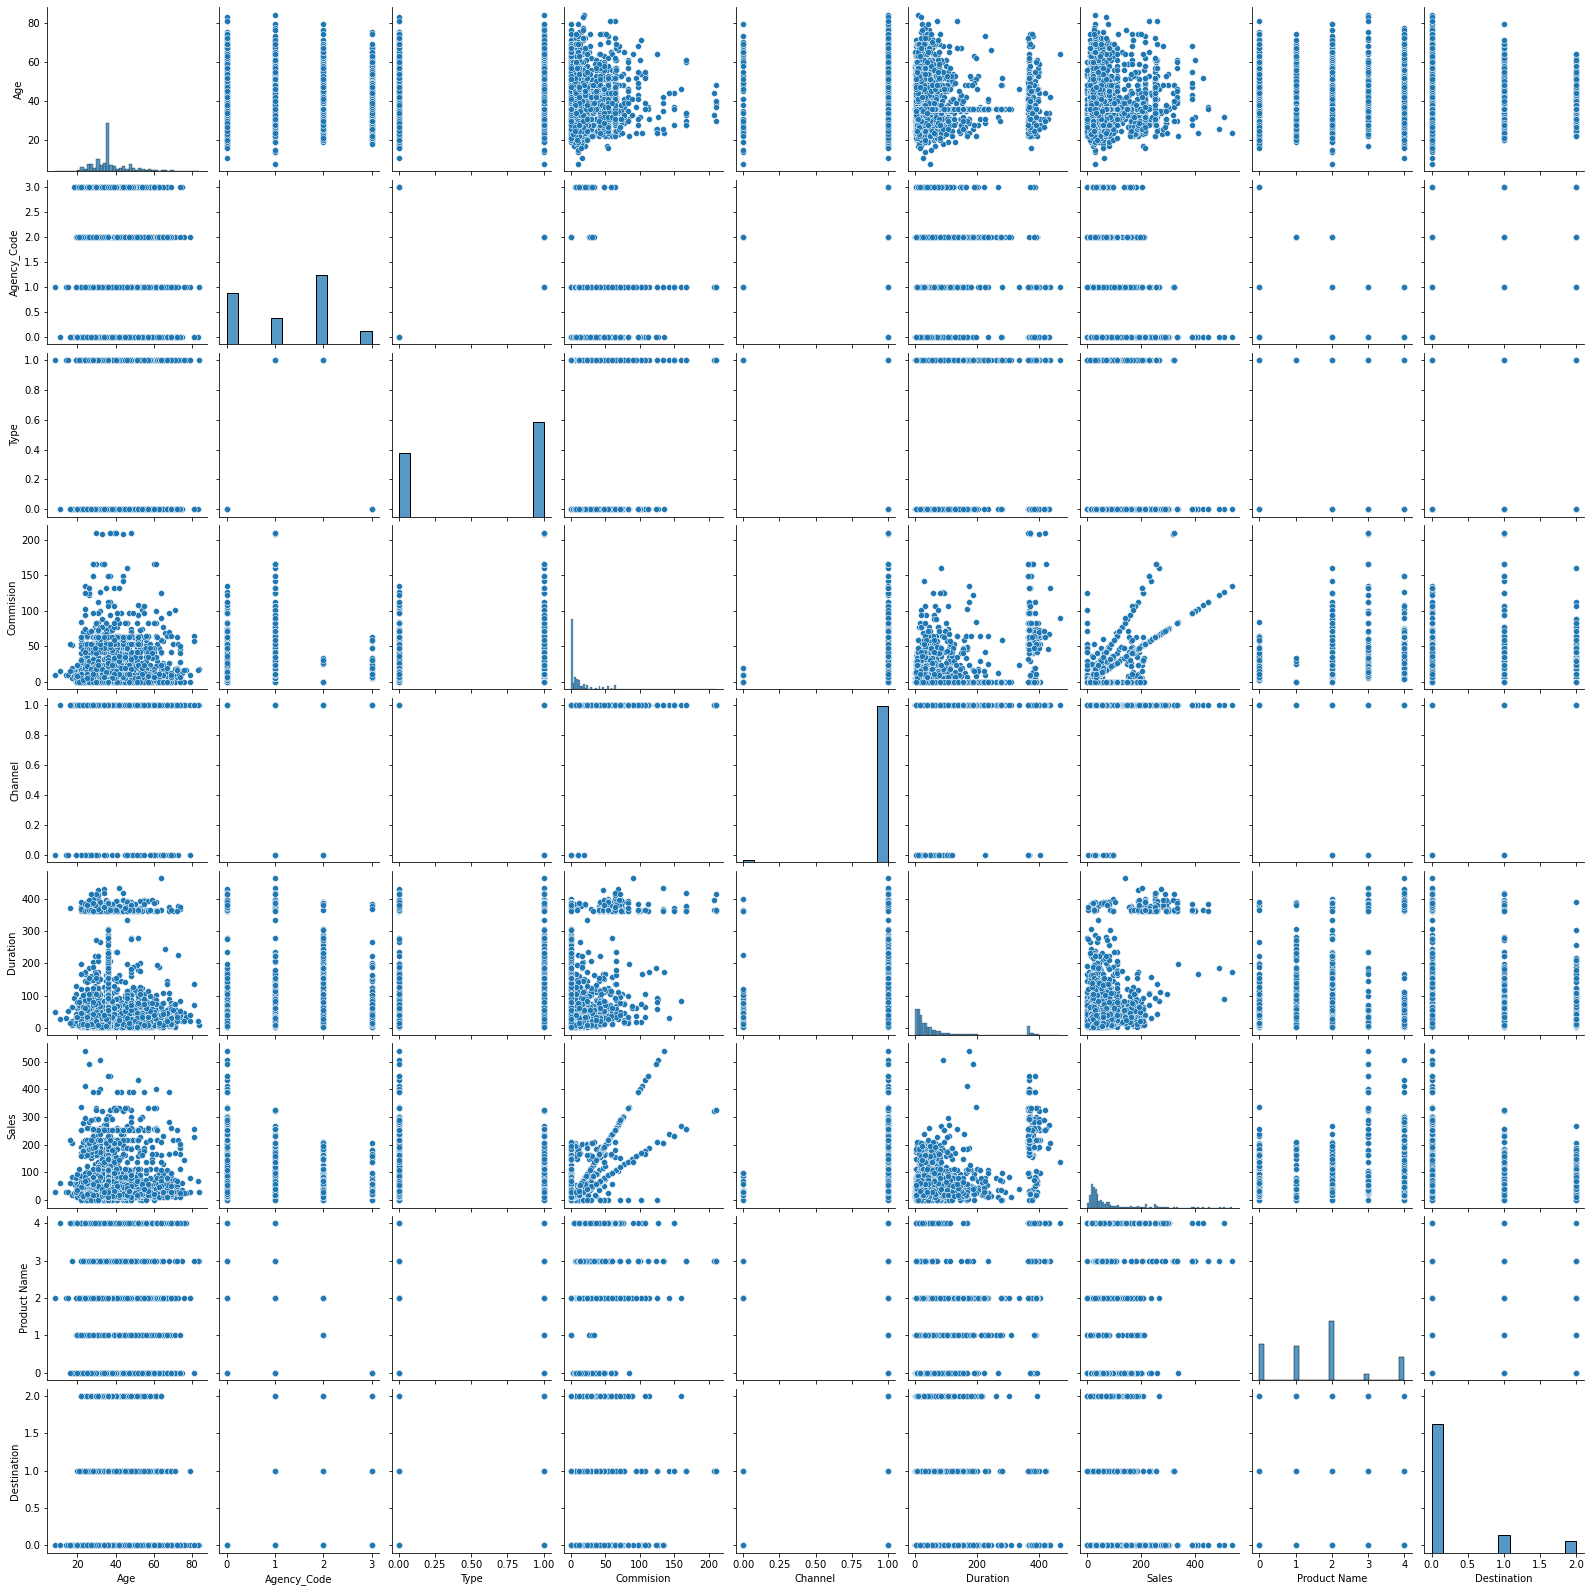

In [434]:
sns.pairplot(df2);
plt.savefig('Pairplot2.jpeg');

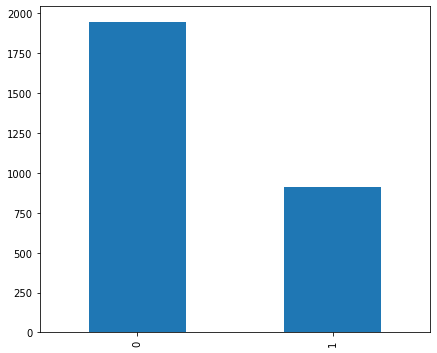

In [230]:
plt.figure(figsize=(7,6))
df2['Claimed'].value_counts().plot(kind='bar')
plt.show()

In [231]:
print("Percentage of 0's -",round(df2.Claimed.value_counts().values[0]/df2.Claimed.count()*100,2),'%')
print("Percentage of 1's -",round(df2.Claimed.value_counts().values[1]/df2.Claimed.count()*100,2),'%')

Percentage of 0's - 68.05 %
Percentage of 1's - 31.95 %


<h4>2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [232]:
X = df2.drop("Claimed", axis=1)
Y = df2.pop("Claimed")

In [233]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0.00,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,0.00,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


In [235]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [435]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X,Y, test_size=.30, random_state=1)

In [436]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('train_labels:',train_labels.shape)
print('test_labels:',test_labels.shape)

X_train: (2002, 9)
X_test: (859, 9)
train_labels: (2002,)
test_labels: (859,)


In [437]:
from sklearn.model_selection import GridSearchCV

<h4>Decision Tree model

In [438]:
from sklearn.tree import DecisionTreeClassifier

In [439]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [442]:
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File1.dot','w')
dot_data = tree.export_graphviz(dtree, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))
ld_Tree_File.close()

In [443]:
param_grid_dt = {
    'max_depth': [7,8],
    'min_samples_leaf': [35, 40],
    'min_samples_split': [105, 120]
}

dtree1 = DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dtree1, param_grid = param_grid_dt, cv = 3)

In [444]:
grid_search_dt.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [35, 40],
                         'min_samples_split': [105, 120]})

In [445]:
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 35, 'min_samples_split': 120}

In [446]:
best_grid_dt = grid_search_dt.best_estimator_

In [447]:
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File_final.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))
ld_Tree_File.close()

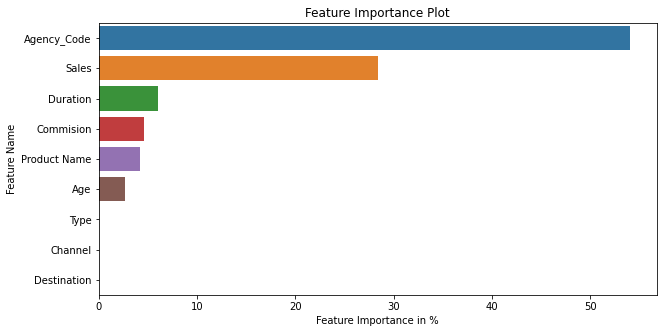

In [291]:
x=pd.DataFrame(best_grid_dt.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x[0],x.index)
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

<h4>Random Forest Model

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [301]:
param_grid_rf = {
    'max_depth': [10,12],
    'max_features': [3,4],
    'min_samples_leaf': [45,50],
    'min_samples_split': [90,100],
    'n_estimators': [200,300,500]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid_rf, cv = 3)

In [302]:
grid_search_rf.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 12], 'max_features': [3, 4],
                         'min_samples_leaf': [45, 50],
                         'min_samples_split': [90, 100],
                         'n_estimators': [200, 300, 500]})

In [303]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 90,
 'n_estimators': 300}

In [304]:
best_grid_rf = grid_search_rf.best_estimator_

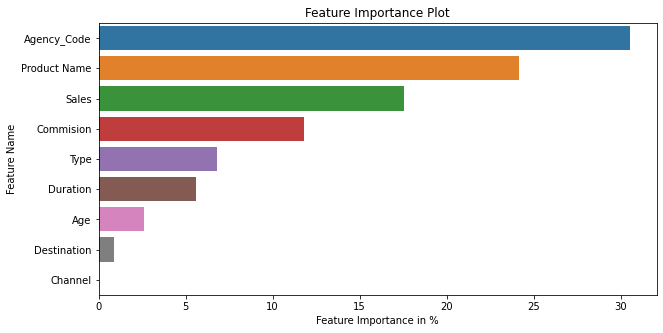

In [305]:
x=pd.DataFrame(best_grid_rf.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x[0],x.index)
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

<h4>ANN

In [448]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ann = sc.fit_transform(X_train)
X_test_ann = sc.transform(X_test)

In [450]:
X_train_ann

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [373]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1)
ann.fit(X_train_ann, train_labels)

MLPClassifier(random_state=1)

In [374]:
param_grid_ann = {
    'hidden_layer_sizes': [(200,200)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann = MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid_ann, cv = 3)

In [375]:
grid_search_ann.fit(X_train_ann, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(200, 200)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [376]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (200, 200),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [377]:
best_grid_ann = grid_search_ann.best_estimator_

<h4>2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [378]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

<h4>Decision Tree model

In [264]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [265]:
print('Accuracy Score on train data is',round(accuracy_score(train_labels, ytrain_predict_dt),2)*100,'%')
print('Accuracy Score on test data is',round(accuracy_score(test_labels, ytest_predict_dt),2)*100,'%')

Accuracy Score on train data is 78.0 %
Accuracy Score on test data is 76.0 %


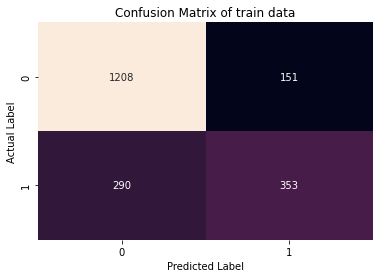

In [266]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_dt),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of train data')
plt.show()

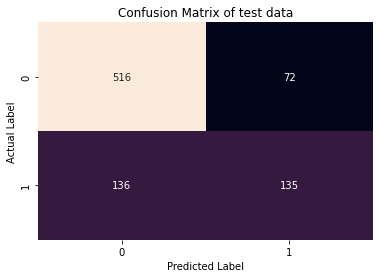

In [267]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_dt),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

AUC of train data for Decision tree model: 0.827


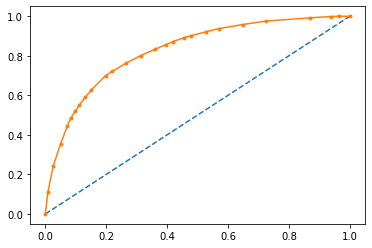

In [331]:
probs_dt = best_grid_dt.predict_proba(X_train)
probs_dt = probs_dt[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs_dt)
print('AUC of train data for Decision tree model: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC of test data for Decision tree model: 0.773


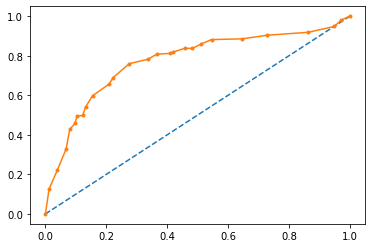

In [335]:
probs_dt_t = best_grid_dt.predict_proba(X_test)
probs_dt_t = probs_dt_t[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs_dt_t)
print('AUC of test data for Decision tree model: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs_dt_t)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [270]:
print('Classification report of train data\n',classification_report(train_labels, ytrain_predict_dt))

Classification report of train data
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1359
           1       0.70      0.55      0.62       643

    accuracy                           0.78      2002
   macro avg       0.75      0.72      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [288]:
print('Classification report of test data\n',classification_report(test_labels, ytest_predict_dt))

Classification report of test data
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       588
           1       0.65      0.50      0.56       271

    accuracy                           0.76       859
   macro avg       0.72      0.69      0.70       859
weighted avg       0.75      0.76      0.75       859



<h4>Random Forest model

In [272]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [273]:
print('Accuracy Score on train data is',round(accuracy_score(train_labels, ytrain_predict_rf),2)*100,'%')
print('Accuracy Score on test data is',round(accuracy_score(test_labels, ytest_predict_rf),2)*100,'%')

Accuracy Score on train data is 78.0 %
Accuracy Score on test data is 78.0 %


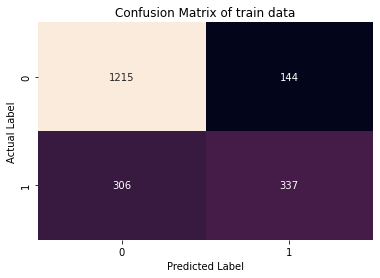

In [274]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_rf),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of train data')
plt.show()

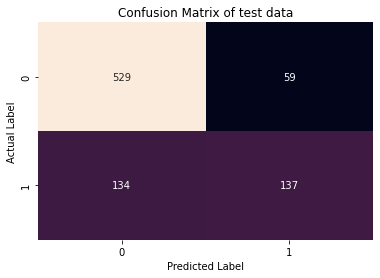

In [275]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rf),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

In [276]:
print(classification_report(train_labels,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.52      0.60       643

    accuracy                           0.78      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.78      0.77      2002



In [277]:
print(classification_report(test_labels,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.70      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.76       859



AUC of train data for Random Forest model: 0.819


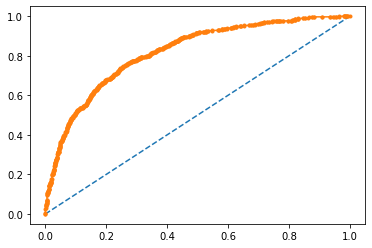

In [363]:
probs_rf = best_grid_rf.predict_proba(X_train)
probs_rf = probs_rf[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs_rf)
print('AUC of train data for Random Forest model: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC of test data for Random Forest model: 0.818


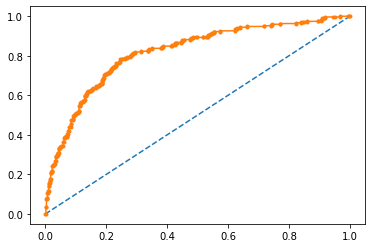

In [365]:
probs_rf_t = best_grid_rf.predict_proba(X_test)
probs_rf_t = probs_rf_t[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs_rf_t)
print('AUC of test data for Random Forest model: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs_rf_t)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

<h4> ANN model

In [451]:
ytrain_predict_ann = best_grid_ann.predict(X_train_ann)
ytest_predict_ann = best_grid_ann.predict(X_test_ann)

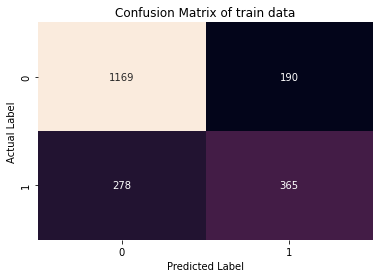

In [452]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_ann),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of train data')
plt.show()

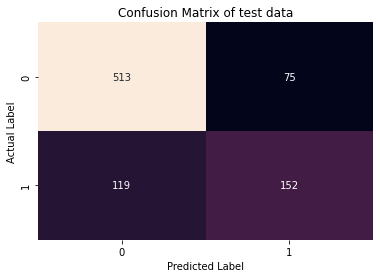

In [453]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict_ann),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

In [454]:
print(classification_report(train_labels,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1359
           1       0.66      0.57      0.61       643

    accuracy                           0.77      2002
   macro avg       0.73      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [455]:
print(classification_report(test_labels,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.67      0.56      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



AUC of train data for ANN model: 0.809


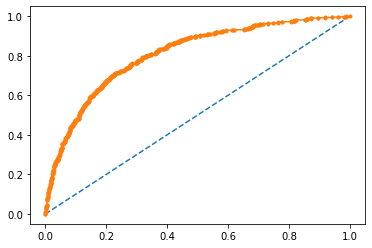

In [456]:
probs_ann = grid_search_ann.predict_proba(X_train_ann)
probs_ann = probs_ann[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs_ann)
print('AUC of train data for ANN model: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC of test data for ANN model: 0.820


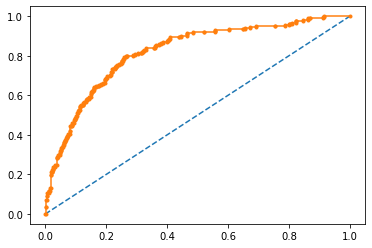

In [457]:
probs_ann_t = grid_search_ann.predict_proba(X_test_ann)
probs_ann_t = probs_ann_t[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs_ann_t)
print('AUC of test data for ANN model: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs_ann_t)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h4>2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [458]:
result=pd.DataFrame(columns=[['Train Accuracy', 'Test Accuracy', 'Train AUC', 'Test AUC', 'Train Precison', 'Test Precison', 'Train Recall', 'Test Recall', 'Train F1 score', 'Test F1 score']], 
                     index=['Decision Tree', 'Random Forest', 'ANN'])

In [459]:
result.loc['Decision Tree',:]=[accuracy_score(train_labels, ytrain_predict_dt).round(2),
                               accuracy_score(test_labels, ytest_predict_dt).round(2),
                               roc_auc_score(train_labels, probs_dt).round(2),
                               roc_auc_score(test_labels, probs_dt_t).round(2),
                               precision_score(train_labels,best_grid_dt.predict(X_train),pos_label=1).round(2), 
                               precision_score(test_labels,best_grid_dt.predict(X_test),pos_label=1).round(2), 
                               recall_score(train_labels, best_grid_dt.predict(X_train), pos_label=1).round(2), 
                               recall_score(test_labels, best_grid_dt.predict(X_test), pos_label=1).round(2), 
                               f1_score(train_labels, best_grid_dt.predict(X_train),pos_label=1).round(2), 
                               f1_score(test_labels, best_grid_dt.predict(X_test), pos_label=1).round(2)
                              ]

In [460]:
result.loc['Random Forest',:]=[accuracy_score(train_labels, ytrain_predict_rf).round(2),
                               accuracy_score(test_labels, ytest_predict_rf).round(2),
                               roc_auc_score(train_labels, probs_rf).round(2),
                               roc_auc_score(test_labels, probs_rf_t).round(2),
                               precision_score(train_labels,best_grid_rf.predict(X_train),pos_label=1).round(2), 
                               precision_score(test_labels,best_grid_rf.predict(X_test),pos_label=1).round(2), 
                               recall_score(train_labels, best_grid_rf.predict(X_train), pos_label=1).round(2), 
                               recall_score(test_labels, best_grid_rf.predict(X_test), pos_label=1).round(2), 
                               f1_score(train_labels, best_grid_rf.predict(X_train),pos_label=1).round(2), 
                               f1_score(test_labels, best_grid_rf.predict(X_test), pos_label=1).round(2)
                              ]                          

In [461]:
result.loc['ANN',:]=[accuracy_score(train_labels, ytrain_predict_ann).round(2),
                               accuracy_score(test_labels, ytest_predict_ann).round(2),
                               roc_auc_score(train_labels, probs_ann).round(2),
                               roc_auc_score(test_labels, probs_ann_t).round(2),
                               precision_score(train_labels,best_grid_ann.predict(X_train_ann),pos_label=1).round(2), 
                               precision_score(test_labels,best_grid_ann.predict(X_test_ann),pos_label=1).round(2), 
                               recall_score(train_labels, best_grid_ann.predict(X_train_ann), pos_label=1).round(2), 
                               recall_score(test_labels, best_grid_ann.predict(X_test_ann), pos_label=1).round(2), 
                               f1_score(train_labels, best_grid_ann.predict(X_train_ann),pos_label=1).round(2), 
                               f1_score(test_labels, best_grid_ann.predict(X_test_ann), pos_label=1).round(2)
                              ]

In [462]:
result

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Precison,Test Precison,Train Recall,Test Recall,Train F1 score,Test F1 score
Decision Tree,0.78,0.76,0.83,0.77,0.7,0.65,0.55,0.5,0.62,0.56
Random Forest,0.78,0.78,0.82,0.82,0.7,0.7,0.52,0.51,0.6,0.59
ANN,0.77,0.77,0.81,0.82,0.66,0.67,0.57,0.56,0.61,0.61


2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations